#Titanic survival Prediction
The dataset titanic.csv contains 12 columns. 

## Dataset Information
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [393]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [394]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [395]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here, we are replacing "String values in Sex" to "numbers". i.e, male to 1 and female to 0.

In [396]:
df['Sex'].replace({'female': 0, 'male': 1}, inplace = True)

We are taking all the attributes containing numerical values to perform Logistic Regression.

In [397]:
data_df = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
data_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,1
3,4,1,0,35.0,1,0,53.1000,1
4,5,3,1,35.0,0,0,8.0500,0


In [398]:
np.any(np.isnan(data_df))

True

We found that some entry in the dataset has NaN value.

In [399]:
np.any(np.isnan(data_df.PassengerId))

False

In [400]:
np.any(np.isnan(data_df.Pclass))

False

In [401]:
np.any(np.isnan(data_df.Sex))

False

In [402]:
np.any(np.isnan(data_df.Age))

True

Only age attribute has NaN values.

In [403]:
np.any(np.isnan(data_df.SibSp))

False

In [404]:
np.any(np.isnan(data_df.Parch))

False

In [405]:
np.any(np.isnan(data_df.Fare))

False

In [406]:
np.any(np.isnan(data_df.Survived))

False

We are replacing NaN values of Age with mean value of Age.

In [407]:
mean_val = data_df['Age'].mean()
data_df = data_df.fillna(mean_val)

In [408]:
data_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,1
3,4,1,0,35.0,1,0,53.1000,1
4,5,3,1,35.0,0,0,8.0500,0


Initializing X part of the dataset.

In [409]:
X = np.asarray(data_df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])
X[0:5]

array([[ 1.  ,  3.  ,  1.  , 22.  ,  1.  ,  0.  ,  7.25],
       [ 2.  ,  1.  ,  0.  , 38.  ,  1.  ,  0.  , 71.28],
       [ 3.  ,  3.  ,  0.  , 26.  ,  0.  ,  0.  ,  7.92],
       [ 4.  ,  1.  ,  0.  , 35.  ,  1.  ,  0.  , 53.1 ],
       [ 5.  ,  3.  ,  1.  , 35.  ,  0.  ,  0.  ,  8.05]])

Initializing y part of the dataset.

In [410]:
y = np.asarray(data_df['Survived'])
y [0:5]

array([0, 1, 1, 1, 0])

In [411]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.73,  0.83,  0.74, -0.59,  0.43, -0.47, -0.5 ],
       [-1.73, -1.57, -1.36,  0.64,  0.43, -0.47,  0.79],
       [-1.72,  0.83, -1.36, -0.28, -0.47, -0.47, -0.49],
       [-1.72, -1.57, -1.36,  0.41,  0.43, -0.47,  0.42],
       [-1.71,  0.83,  0.74,  0.41, -0.47, -0.47, -0.49]])

In [412]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 7) (712,)
Test set: (179, 7) (179,)


In [413]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [414]:
yhat = LR.predict(X_test)
yhat[0:5]

array([0, 0, 1, 1, 0])

In [415]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.72, 0.28],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.27, 0.73],
       [0.74, 0.26]])

In [416]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 40  20]
 [ 12 107]]


Confusion matrix, without normalization
[[ 40  20]
 [ 12 107]]


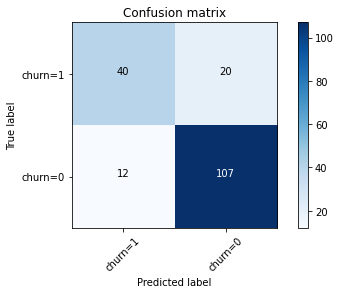

In [417]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Normalized confusion matrix
[[0.67 0.33]
 [0.1  0.9 ]]


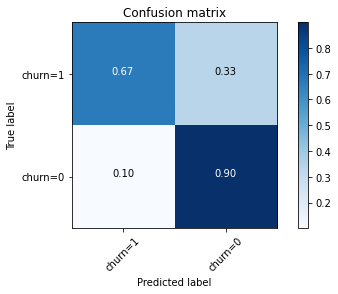

In [418]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= True,  title='Confusion matrix')

In [419]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       119
           1       0.77      0.67      0.71        60

    accuracy                           0.82       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.82      0.82      0.82       179



Now I am checking if removing one or any of the attributes retains the same accuracy. After using trial and error method to remove each attribute and check accuracy and confusion matrix, I found that confusion matrix values change only when 'Sex' and 'SibSp' attributes are removed from the dataset.

So, i think the prediction is more weighted on 'Sex' and 'SibSp'. So in the next few codes i am experimenting linear regression over 
{Sex, SibSp} vs Survived

In [420]:
X = np.asarray(data_df[[ 'Sex', 'SibSp']])
X[0:5]

array([[1, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [1, 0]])

In [421]:
y = np.asarray(data_df['Survived'])
y [0:5]

array([0, 1, 1, 1, 0])

In [422]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.74,  0.43],
       [-1.36,  0.43],
       [-1.36, -0.47],
       [-1.36,  0.43],
       [ 0.74, -0.47]])

In [423]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 2) (712,)
Test set: (179, 2) (179,)


In [424]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [425]:
yhat = LR.predict(X_test)
yhat[0:5]

array([0, 0, 1, 1, 0])

In [426]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.68, 0.32],
       [0.68, 0.32],
       [0.33, 0.67],
       [0.33, 0.67],
       [0.74, 0.26]])

In [427]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 39  21]
 [ 12 107]]


Confusion matrix, without normalization
[[ 39  21]
 [ 12 107]]


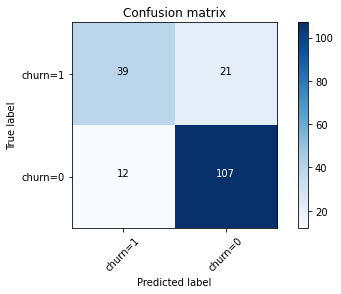

In [428]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Normalized confusion matrix
[[0.65 0.35]
 [0.1  0.9 ]]


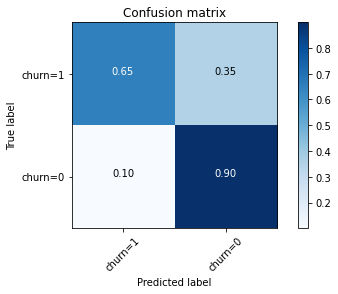

In [429]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= True,  title='Confusion matrix')

In [430]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       119
           1       0.76      0.65      0.70        60

    accuracy                           0.82       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.81      0.82      0.81       179



As we can see confusion matrix has remained the same.